<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Deepishka_Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section 1: Importing necessary modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import seaborn as sns

## Section 2: Loading and exploring the dataset

https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification

The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.



In [ ]:
# Load the Parkinson's Disease Classification Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
parkinsons_data = pd.read_csv(url)


In [ ]:
#information about the dataframe
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Variable description

name: ASCII subject name and recording number. This attribute is not relevant for classification and should be removed during data preprocessing.

MDVP:Fo(Hz): Average vocal fundamental frequency. This is a measure of the average frequency of the sound produced by the vocal cords during phonation.

MDVP:Fhi(Hz): Maximum vocal fundamental frequency. This represents the highest frequency of the sound produced by the vocal cords.

MDVP:Flo(Hz): Minimum vocal fundamental frequency. This represents the lowest frequency of the sound produced by the vocal cords.

MDVP:Jitter(%): Jitter percentage, which is a measure of the variability in the fundamental frequency of the voice.

MDVP:Jitter(Abs): Absolute jitter, which is the average absolute difference between consecutive periods of the fundamental frequency.

MDVP:RAP: Relative amplitude perturbation, which is a measure of the variability in the amplitude of the voice.

MDVP:PPQ: Five-point period perturbation quotient, which is another measure of the variability in the fundamental frequency.

Jitter:DDP: Average absolute difference of differences between cycles, divided by the average period. This is a measure of the jitter.

MDVP:Shimmer: Shimmer percentage, which is a measure of the variability in the amplitude of the voice.

MDVP:Shimmer(dB): Shimmer in decibels, which is the average absolute base-10 logarithm of the difference between the amplitudes of consecutive periods.
Shimmer:APQ3: Three-point amplitude perturbation quotient, which is a measure of the shimmer.

Shimmer:APQ5: Five-point amplitude perturbation quotient, which is another measure of the shimmer.

MDVP:APQ: Eleven-point amplitude perturbation quotient, which is another measure of the shimmer.

Shimmer:DDA: Average absolute difference between consecutive differences between the amplitudes of consecutive periods. This is a measure of the shimmer.

NHR: Noise-to-harmonics ratio, which is a measure of the noise in the voice signal.

HNR: Harmonics-to-noise ratio, which is the inverse of NHR.

RPDE: Recurrence period density entropy, which is a nonlinear dynamical complexity measure.

DFA: Detrended fluctuation analysis, which is a method for quantifying the self-similarity of a signal.

spread1: Nonlinear measure of fundamental frequency variation.

spread2: Another nonlinear measure of fundamental frequency variation.
D2: A nonlinear dynamical complexity measure.

PPE: Pitch period entropy, which is a nonlinear measure of the fundamental frequency variation.

In [ ]:

# Rename the columns with user-friendly descriptions
column_names = {
    'MDVP:Fo(Hz)': 'Avg_Vocal_Fundamental_Freq',
    'MDVP:Fhi(Hz)': 'Max_Vocal_Fundamental_Freq',
    'MDVP:Flo(Hz)': 'Min_Vocal_Fundamental_Freq',
    'MDVP:Jitter(%)': 'Jitter_Percent',
    'MDVP:Jitter(Abs)': 'Jitter_Abs',
    'MDVP:RAP': 'Relative_Amplitude_Perturbation',
    'MDVP:PPQ': 'Pitch_Perturbation_Quotient',
    'Jitter:DDP': 'Jitter_Diff_Periods',
    'MDVP:Shimmer': 'Shimmer_Percent',
    'MDVP:Shimmer(dB)': 'Shimmer_dB',
    'Shimmer:APQ3': 'Shimmer_Ampl_Perturbation_Quotient_3',
    'Shimmer:APQ5': 'Shimmer_Ampl_Perturbation_Quotient_5',
    'MDVP:APQ': 'Ampl_Perturbation_Quotient',
    'Shimmer:DDA': 'Shimmer_Diff_Ampl',
    'NHR': 'Noise_to_Harmonics_Ratio',
    'HNR': 'Harmonics_to_Noise_Ratio',
    'status': 'Disease_Status',
    'RPDE': 'Recurrence_Period_Density_Entropy',
    'DFA': 'Detrended_Fluctuation_Analysis',
    'spread1': 'Nonlinear_Fundamental_Freq_Variation_1',
    'spread2': 'Nonlinear_Fundamental_Freq_Variation_2',
    'D2': 'Correlation_Dimension',
    'PPE': 'Pitch_Period_Entropy',
    'Fhi_Flo_Ratio': 'Max_to_Min_Fundamental_Freq_Ratio',
    'Jitter_Percentage': 'Jitter_Percentage_Combined',
    'Shimmer_Percentage': 'Shimmer_Percentage_Combined',
    'HNR_NHR_Ratio': 'Harmonics_to_Noise_Ratio_Interaction'
}

parkinsons_data = parkinsons_data.drop(['name'], axis=1)
parkinsons_data = parkinsons_data.rename(columns=column_names)

In [ ]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Avg_Vocal_Fundamental_Freq              195 non-null    float64
 1   Max_Vocal_Fundamental_Freq              195 non-null    float64
 2   Min_Vocal_Fundamental_Freq              195 non-null    float64
 3   Jitter_Percent                          195 non-null    float64
 4   Jitter_Abs                              195 non-null    float64
 5   Relative_Amplitude_Perturbation         195 non-null    float64
 6   Pitch_Perturbation_Quotient             195 non-null    float64
 7   Jitter_Diff_Periods                     195 non-null    float64
 8   Shimmer_Percent                         195 non-null    float64
 9   Shimmer_dB                              195 non-null    float64
 10  Shimmer_Ampl_Perturbation_Quotient_3    195 non-null    float6

In [ ]:
parkinsons_data.head()

,Avg_Vocal_Fundamental_Freq,Max_Vocal_Fundamental_Freq,Min_Vocal_Fundamental_Freq,Jitter_Percent,Jitter_Abs,Relative_Amplitude_Perturbation,Pitch_Perturbation_Quotient,Jitter_Diff_Periods,Shimmer_Percent,Shimmer_dB,...,Shimmer_Diff_Ampl,Noise_to_Harmonics_Ratio,Harmonics_to_Noise_Ratio,Disease_Status,Recurrence_Period_Density_Entropy,Detrended_Fluctuation_Analysis,Nonlinear_Fundamental_Freq_Variation_1,Nonlinear_Fundamental_Freq_Variation_2,Correlation_Dimension,Pitch_Period_Entropy
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinsons_data.describe()

,Avg_Vocal_Fundamental_Freq,Max_Vocal_Fundamental_Freq,Min_Vocal_Fundamental_Freq,Jitter_Percent,Jitter_Abs,Relative_Amplitude_Perturbation,Pitch_Perturbation_Quotient,Jitter_Diff_Periods,Shimmer_Percent,Shimmer_dB,...,Shimmer_Diff_Ampl,Noise_to_Harmonics_Ratio,Harmonics_to_Noise_Ratio,Disease_Status,Recurrence_Period_Density_Entropy,Detrended_Fluctuation_Analysis,Nonlinear_Fundamental_Freq_Variation_1,Nonlinear_Fundamental_Freq_Variation_2,Correlation_Dimension,Pitch_Period_Entropy
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
parkinsons_data['Disease_Status'].value_counts()

Disease_Status
1    147
0     48
Name: count, dtype: int64

<Axes: ylabel='Disease_Status'>

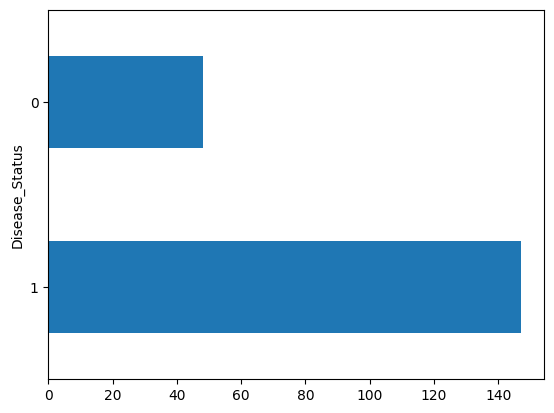

In [ ]:
#visualizing categories in the categorical column
parkinsons_data['Disease_Status'].value_counts().plot(kind = 'barh')

<Axes: >

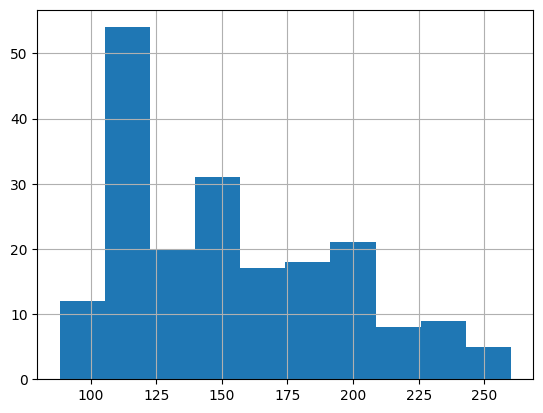

In [ ]:
parkinsons_data['Avg_Vocal_Fundamental_Freq'].hist()

<Axes: >

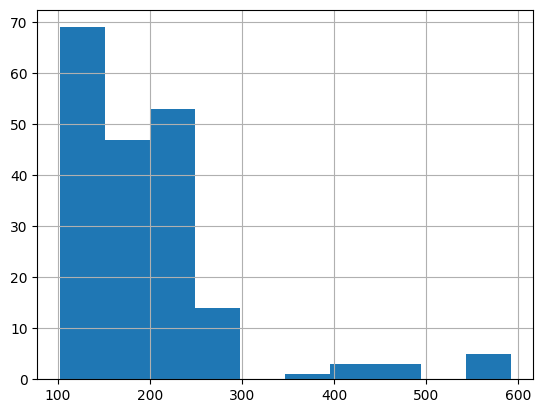

In [ ]:
parkinsons_data['Max_Vocal_Fundamental_Freq'].hist()

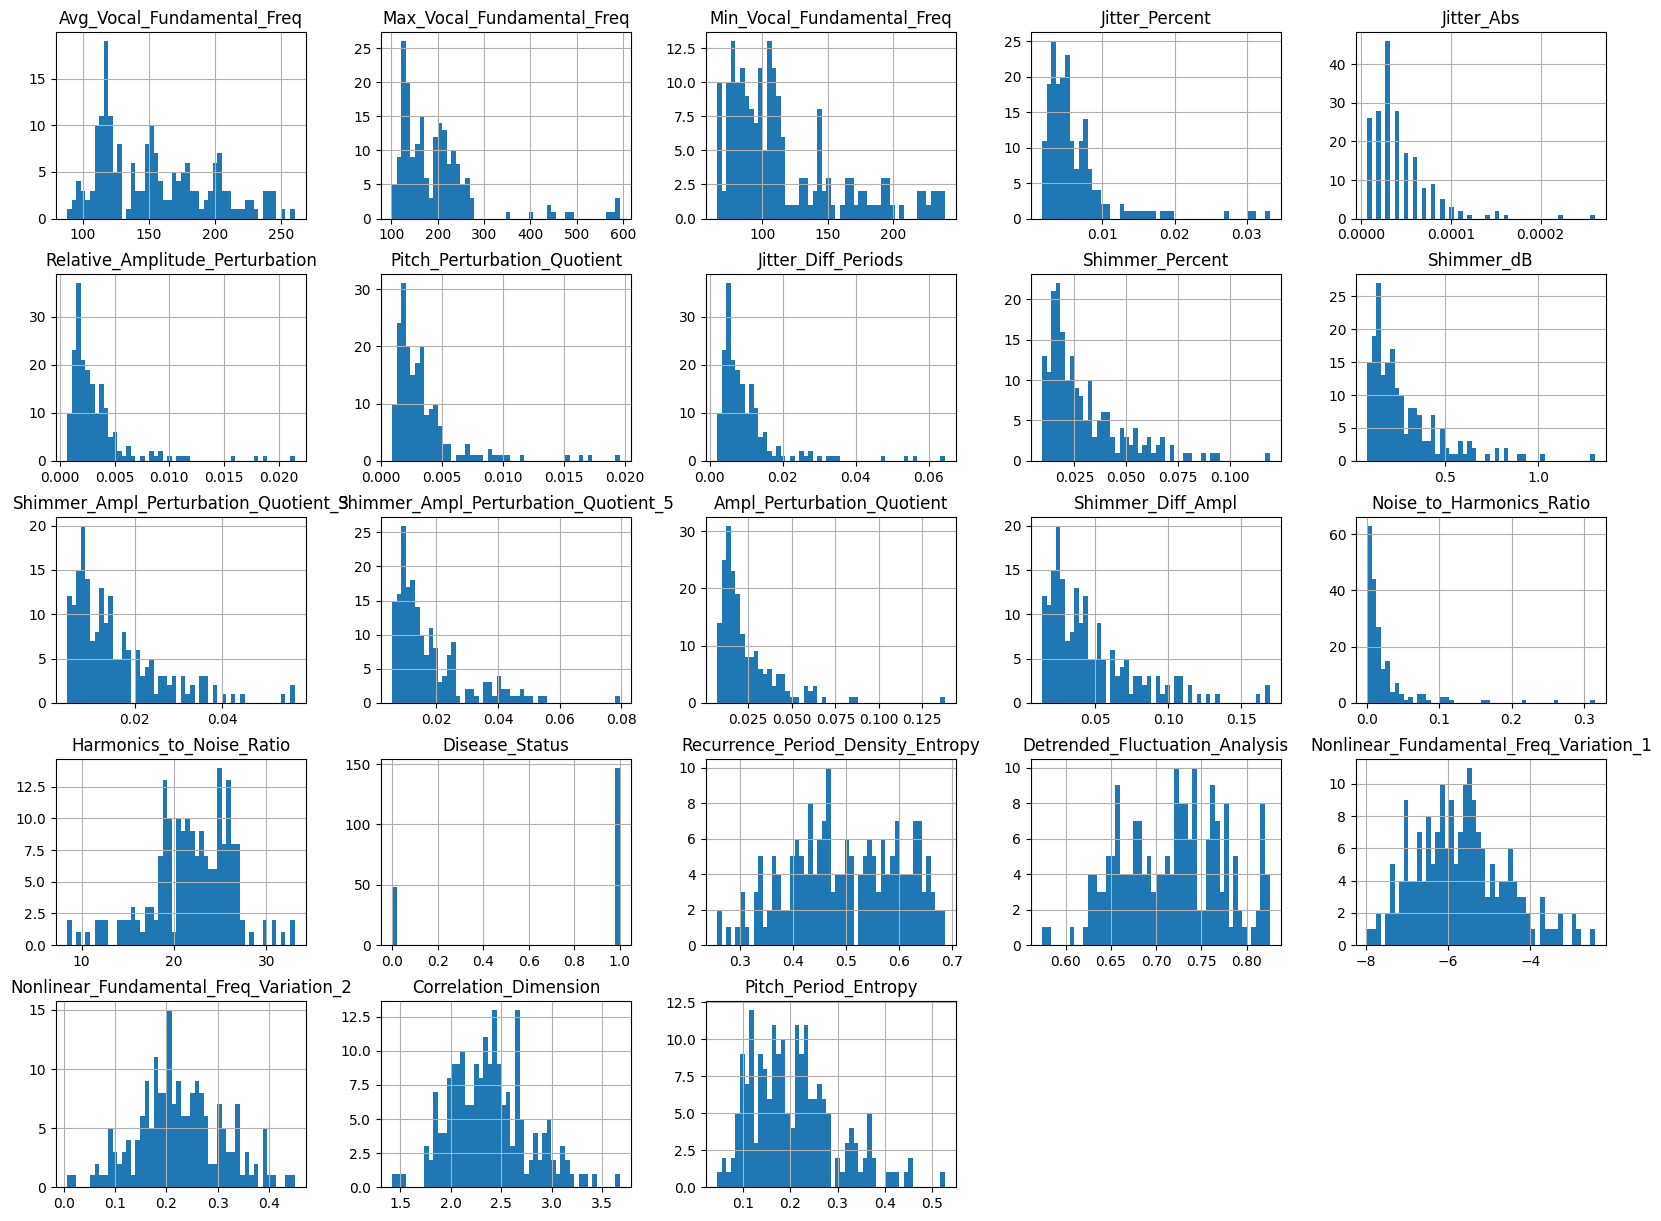

In [ ]:
# Histograms of the housing data
parkinsons_data.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

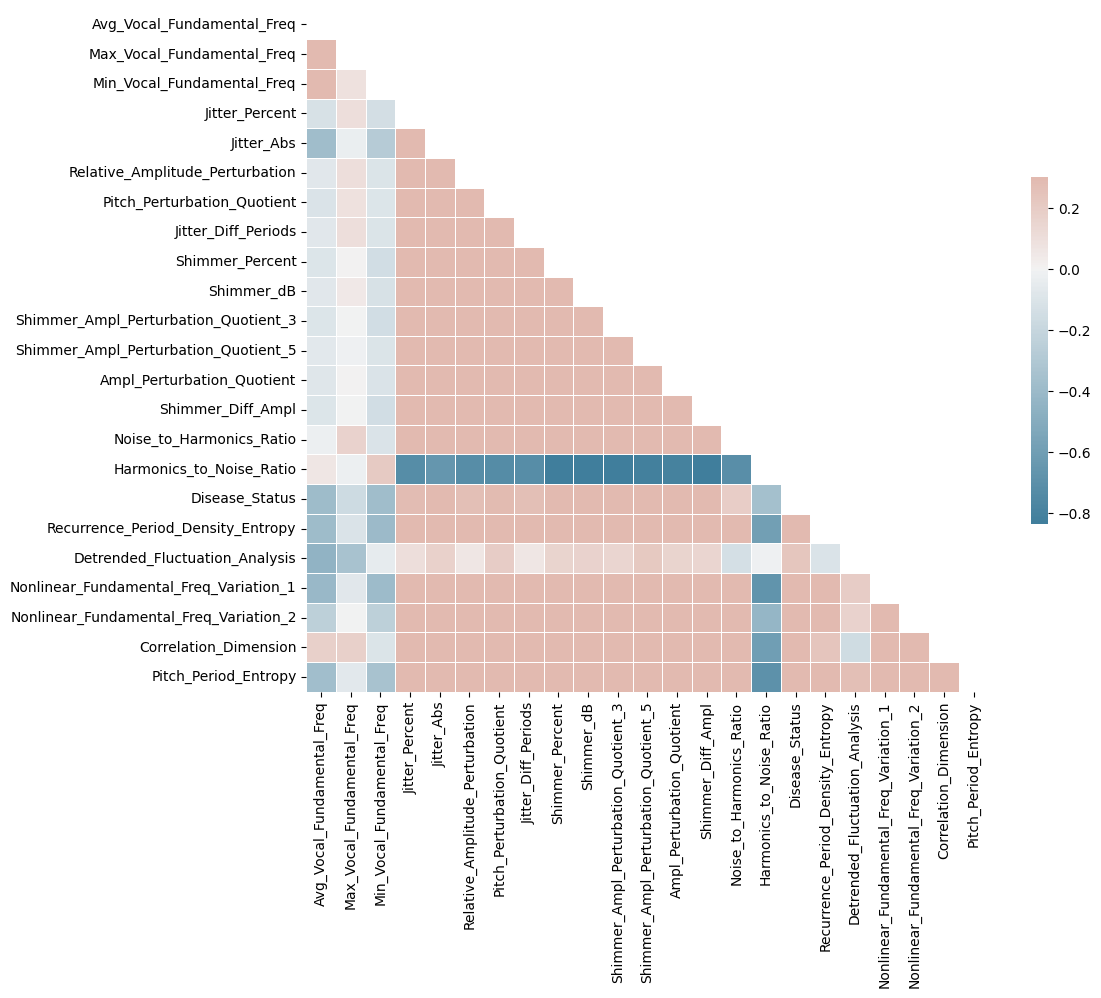

In [ ]:
# Compute the correlation matrix
corr_matrix = parkinsons_data.corr()

# Plot the correlation matrix as a heatmap
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr_matrix, mask = mask, cmap = cmap, vmax = 0.3, center = 0,
            square = True, linewidth = 0.5, cbar_kws = {'shrink': 0.5})

There is a strong positive correlation between Pitch Period Entropy and Nonlinear Fundamental Frequency Variation 1, along with moderate positive correlations with Disease Status.

There is a moderate to weak positive correlations between Disease Status and various jitter, shimmer, and perturbation.

The moderate to weak positive correlations between the Disease Status and various voice measures.

The weak negative correlations between the average and minimum vocal fundamental frequency and perturbation and shimmer measures.

The presence of correlations between Disease Status and nonlinear measures such as Correlation Dimension and Detrended Fluctuation Analysis.

Section 3: Data preprocessing

In [ ]:
#dealing with missing values
incomplete_rows = parkinsons_data[parkinsons_data.isnull().any(axis=1)].head()
incomplete_rows

,Avg_Vocal_Fundamental_Freq,Max_Vocal_Fundamental_Freq,Min_Vocal_Fundamental_Freq,Jitter_Percent,Jitter_Abs,Relative_Amplitude_Perturbation,Pitch_Perturbation_Quotient,Jitter_Diff_Periods,Shimmer_Percent,Shimmer_dB,...,Shimmer_Diff_Ampl,Noise_to_Harmonics_Ratio,Harmonics_to_Noise_Ratio,Disease_Status,Recurrence_Period_Density_Entropy,Detrended_Fluctuation_Analysis,Nonlinear_Fundamental_Freq_Variation_1,Nonlinear_Fundamental_Freq_Variation_2,Correlation_Dimension,Pitch_Period_Entropy


In [ ]:
#feature engineering

In [ ]:
# Step 1: Ratio of Max_Vocal_Fundamental_Freq to Min_Vocal_Fundamental_Freq
parkinsons_data['Max_Min_Fundamental_Freq_Ratio'] = parkinsons_data['Max_Vocal_Fundamental_Freq'] / parkinsons_data['Min_Vocal_Fundamental_Freq']

In [ ]:
# Step 2: Jitter and Shimmer Percentages
jitter_cols = ['Jitter_Percent', 'Jitter_Abs', 'Relative_Amplitude_Perturbation', 'Pitch_Perturbation_Quotient', 'Jitter_Diff_Periods']
shimmer_cols = ['Shimmer_Percent', 'Shimmer_dB', 'Shimmer_Ampl_Perturbation_Quotient_3', 'Shimmer_Ampl_Perturbation_Quotient_5', 'Ampl_Perturbation_Quotient', 'Shimmer_Diff_Ampl']

parkinsons_data['Combined_Jitter_Percentage'] = parkinsons_data[jitter_cols].mean(axis=1)
parkinsons_data['Combined_Shimmer_Percentage'] = parkinsons_data[shimmer_cols].mean(axis=1)

In [ ]:
# Step 3: Harmonics_to_Noise_Ratio and Noise_to_Harmonics_Ratio Interaction
parkinsons_data['Harmonics_to_Noise_Noise_to_Harmonics_Ratio'] = parkinsons_data['Harmonics_to_Noise_Ratio'] / parkinsons_data['Noise_to_Harmonics_Ratio']

In [ ]:
#Feature Scaling

In [ ]:
cols_to_scale = parkinsons_data.columns[1:-1]

scaler = StandardScaler()
parkinsons_data[cols_to_scale] = scaler.fit_transform(parkinsons_data[cols_to_scale])

# Display the first few rows of the updated dataset
parkinsons_data.head()

,Avg_Vocal_Fundamental_Freq,Max_Vocal_Fundamental_Freq,Min_Vocal_Fundamental_Freq,Jitter_Percent,Jitter_Abs,Relative_Amplitude_Perturbation,Pitch_Perturbation_Quotient,Jitter_Diff_Periods,Shimmer_Percent,Shimmer_dB,...,Recurrence_Period_Density_Entropy,Detrended_Fluctuation_Analysis,Nonlinear_Fundamental_Freq_Variation_1,Nonlinear_Fundamental_Freq_Variation_2,Correlation_Dimension,Pitch_Period_Entropy,Max_Min_Fundamental_Freq_Ratio,Combined_Jitter_Percentage,Combined_Shimmer_Percentage,Harmonics_to_Noise_Noise_to_Harmonics_Ratio
0,119.992,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,0.159222,0.274160,0.718770,951.289009
1,122.400,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,-0.485669,0.639681,1.730507,989.372732
2,116.682,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,-0.592184,0.890945,1.079363,1577.616501
3,116.676,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,-0.541097,0.732742,1.249062,1525.794531
4,116.014,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,-0.505822,1.308167,1.656219,1111.997736


In [ ]:
# Separate features and target variable
X = df.drop(['name', 'status'], axis=1)
y = df['status']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
135,110.453,127.611,105.554,0.00494,0.00004,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
122,138.190,203.522,83.340,0.00704,0.00005,0.00406,0.00398,0.01218,0.04479,0.441,...,0.03220,0.07761,0.01968,18.305,0.538016,0.741480,-5.418787,0.160267,2.090438,0.229892
167,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
85,180.978,200.125,155.495,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,0.331,...,0.02877,0.06321,0.02782,16.176,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,155.078,163.736,144.148,0.00168,0.00001,0.00068,0.00092,0.00204,0.01064,0.097,...,0.00928,0.01567,0.00233,29.746,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
14,152.845,163.305,75.836,0.00294,0.00002,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
92,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,0.383,...,0.03051,0.07150,0.01914,18.780,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730


In [ ]:
from sklearn.model_selection import train_test_split

# Perform stratified split
X = parkinsons_data.drop(['Disease_Status'], axis=1)  # Features
y = parkinsons_data['Disease_Status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train

,Avg_Vocal_Fundamental_Freq,Max_Vocal_Fundamental_Freq,Min_Vocal_Fundamental_Freq,Jitter_Percent,Jitter_Abs,Relative_Amplitude_Perturbation,Pitch_Perturbation_Quotient,Jitter_Diff_Periods,Shimmer_Percent,Shimmer_dB,...,Recurrence_Period_Density_Entropy,Detrended_Fluctuation_Analysis,Nonlinear_Fundamental_Freq_Variation_1,Nonlinear_Fundamental_Freq_Variation_2,Correlation_Dimension,Pitch_Period_Entropy,Max_Min_Fundamental_Freq_Ratio,Combined_Jitter_Percentage,Combined_Shimmer_Percentage,Harmonics_to_Noise_Noise_to_Harmonics_Ratio
172,110.739,-0.915089,-0.372858,-0.550172,-0.401899,-0.542678,-0.525587,-0.542757,-0.790553,-0.767845,...,-1.248572,1.051912,-0.368923,-0.410322,-1.290736,-0.360445,-0.625520,-0.545291,-0.771556,6174.418605
84,176.858,0.092652,-0.944044,0.258399,-0.113985,0.295116,0.273863,0.295035,0.969820,0.785838,...,0.559041,0.208121,0.363695,1.401134,1.879110,0.395686,0.673264,0.283983,0.852253,253.985375
135,110.453,-0.761522,-0.248116,-0.264794,-0.113985,-0.292691,-0.107693,-0.293897,0.615193,0.497738,...,1.494012,-0.206763,0.322581,1.148357,0.654679,0.242161,-0.564756,-0.261456,0.542185,700.158165
42,237.226,0.550328,2.508712,-0.670114,-0.977729,-0.546056,-0.590996,-0.546136,-0.648064,-0.608361,...,-1.866157,-1.158230,-1.495439,-1.536962,0.091698,-1.240652,-0.655078,-0.587685,-0.614060,3072.432432
143,202.805,0.376993,-0.693224,-0.521221,-0.689814,-0.478492,-0.485614,-0.477446,-0.517804,-0.526046,...,0.362349,-1.548509,-0.197052,-0.158157,0.232887,-0.194905,0.637757,-0.493073,-0.517757,929.701493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,148.143,-0.450629,0.431157,-0.475726,-0.401899,-0.427819,-0.412937,-0.427899,-0.808630,-0.778134,...,-0.964906,1.091608,-0.024653,0.172669,1.213366,-0.153765,-0.608670,-0.440339,-0.787434,4385.740741
111,208.519,0.254339,1.904999,-0.026979,-0.401899,0.126206,-0.020480,0.127251,-0.643279,-0.654662,...,-1.547516,-0.102059,-0.723767,-0.506449,0.315623,-0.780546,-0.647842,0.067358,-0.650276,2699.638554
130,120.289,-0.755692,-0.371245,-0.268930,-0.113985,-0.208236,-0.387500,-0.207190,-0.828833,-0.809002,...,-0.302634,0.107729,-0.414655,-0.275032,0.413544,-0.407492,-0.507885,-0.249565,-0.817763,1487.515528
33,202.266,0.158882,1.860285,-0.914133,-1.006520,-0.802799,-0.863536,-0.804004,-1.072340,-1.014787,...,-1.253925,0.435447,-1.849661,-0.576625,-2.192723,-1.673313,-0.674975,-0.845204,-1.034847,45394.444444


In [ ]:
from sklearn.model_selection import train_test_split

def disease_status_proportions(data):
    return data.value_counts() / len(data)

# Random split
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size=0.2, random_state=42)

# Stratified split
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Compare proportions and calculate percentage errors
compare_props = pd.DataFrame({
    "Overall": disease_status_proportions(y),
    "Random": disease_status_proportions(y_test_rand),
    "Stratified": disease_status_proportions(y_test_strat)
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

print(compare_props)

                 Overall    Random  Stratified  Rand. %error  Strat. %error
Disease_Status                                                             
-1.750000       0.246154  0.179487     0.25641    -27.083333       4.166667
 0.571429       0.753846  0.820513     0.74359      8.843537      -1.360544


Section 4: Model training and evaluation